In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgbm
import numpy as np
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
import os
import subprocess
from lightgbm.plotting import plot_tree

from imagecleanup2 import cleanupImage as cleanupImage2

%matplotlib inline
plt.style.use('ggplot')

In [6]:
print(plt.style.available)

['seaborn-notebook', 'seaborn-paper', 'seaborn-dark-palette', 'grayscale', 'seaborn-colorblind', 'seaborn-poster', 'seaborn-pastel', 'ggplot', 'classic', 'fivethirtyeight', 'seaborn-white', 'seaborn-talk', 'seaborn-ticks', 'dark_background', 'seaborn-whitegrid', 'seaborn-dark', 'seaborn-darkgrid', 'bmh', 'seaborn-deep', 'seaborn-bright', 'seaborn-muted', 'seaborn']


In [7]:
model = lgbm.Booster(model_file = 'lgbm167.425920489')

In [8]:
df = pd.read_csv('Train.csv',sep=';')
df['lin_mass'] = np.power(10, df.logMstar)
df['lin_err'] = df.lin_mass * np.log(10) * df.err_logMstar

df = df[df.logMstar!=-99]
df = df[df.err_logMstar!=0]
np.random.seed(0)

N=len(df.SDSS_ID.values)
M=N-4000
ids = df.SDSS_ID.values[:N]
print(len(ids))

74883


In [9]:
Y = df.logMstar.values[:N]

In [10]:
pred = np.load("val_pred_mass_log.npy")

In [11]:
pred.shape

(1000,)

In [12]:
Y = df.logMstar.values[9000:10000]

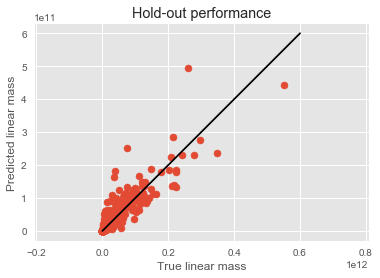

In [13]:
plt.scatter(10**Y, 10**pred)
#plt.hist2d(10**Y, 10**pred)
#plt.colorbar()
plt.plot( [0,6*10**11],[0,6*10**11], c='black')
plt.title("Hold-out performance")
plt.xlabel("True linear mass")
plt.ylabel("Predicted linear mass")
plt.axes().set_aspect('equal', 'datalim')

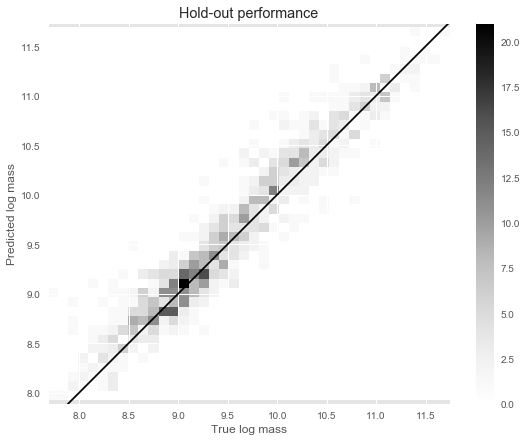

In [14]:
plt.figure(figsize=(9,7))
plt.axis([8, 12,8,12])
plt.hist2d(Y, pred,bins=40)
plt.plot( [0,15],[0,15], c='black')
plt.title("Hold-out performance")
plt.xlabel("True log mass")
plt.ylabel("Predicted log mass")
plt.colorbar()
plt.axes().set_aspect('equal', 'datalim')

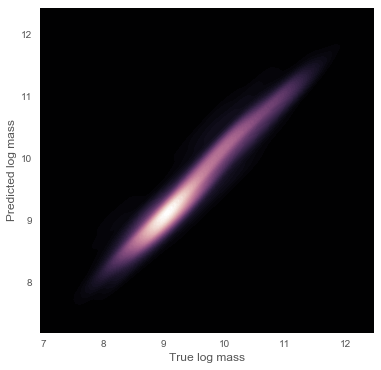

In [15]:
import pandas as pd
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("whitegrid")
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(Y, pred, cmap=cmap, n_levels=100, shade=True)
sns.set_style("whitegrid")
plt.xlabel("True log mass")
plt.ylabel("Predicted log mass")


In [16]:
df_valid = pd.read_csv('validation_132.001682705.csv')

In [17]:
df_valid.shape

(4000, 3)

In [18]:
valid_y = df_valid['true_lin_mass']
valid_pred = df_valid['pred_lin_mass']

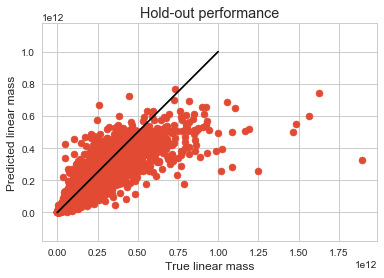

In [19]:
plt.scatter(valid_y, valid_pred)
#plt.hist2d(10**Y, 10**pred)
#plt.colorbar()
plt.plot( [0,10*10**11],[0,10*10**11], c='black')
plt.title("Hold-out performance")
plt.xlabel("True linear mass")
plt.ylabel("Predicted linear mass")
plt.axes().set_aspect('equal', 'datalim')

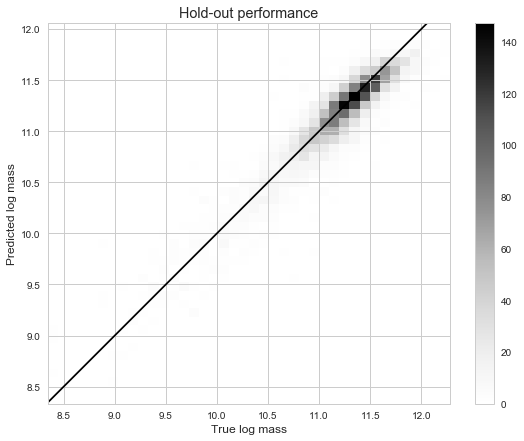

In [20]:
plt.figure(figsize=(9,7))
plt.axis([8, 12,8,12])
plt.hist2d(np.log10(valid_y), np.log10(valid_pred), bins=40)
plt.colorbar()
plt.plot( [0,15],[0,15], c='black')
plt.title("Hold-out performance")
plt.xlabel("True log mass")
plt.ylabel("Predicted log mass")
plt.axes().set_aspect('equal', 'datalim')

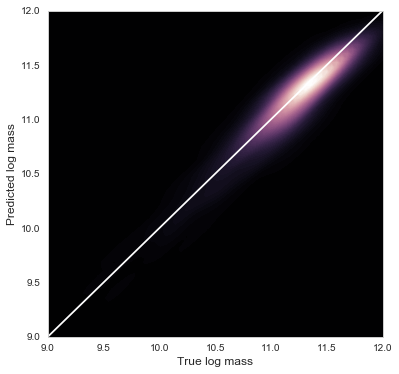

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("whitegrid")
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(np.log10(valid_y), np.log10(valid_pred), cmap=cmap, n_levels=100, shade=True)
plt.plot( [9,12],[9,12], c='white')
plt.axis([9, 12,9,12])
sns.set_style("whitegrid")
plt.xlabel("True log mass")
plt.ylabel("Predicted log mass")

In [22]:
X = np.load("Xg3f.npy")

In [23]:
X.shape

(74883, 3067)

In [33]:
idxs = [1700, 785, 108, 100, 977, 87, 1912, 499, 910, 2002]

In [34]:
curr_idx=0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d054ba780>]], dtype=object)

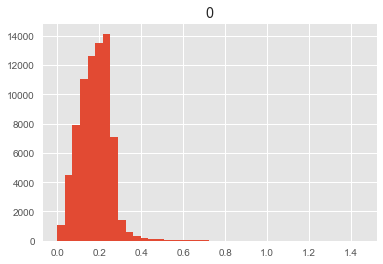

In [35]:
pd.DataFrame(X[:,idxs[curr_idx]]).hist(bins=40)

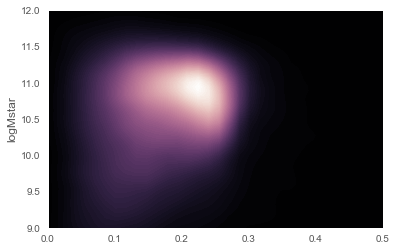

In [36]:
#plt.figure(figsize=(15,15))
#plt.hist2d(X[:,idxs[curr_idx]], df.logMstar, bins=30)
sns.kdeplot(X[:,idxs[curr_idx]], df.logMstar, cmap=cmap, n_levels=100, shade=True)
plt.plot()
plt.axis([0,0.5,9,12])
plt.show()

In [37]:
df_idx = np.argsort(X[:,idxs[curr_idx]])[-20:]
df_idx

array([69818, 21096, 71675, 13737, 67589, 70058, 71690, 14747, 71068,
       70252, 26933, 62192, 71313,  9290, 29209,  6797, 64922, 11205,
       70717, 69688])

In [38]:
ids = df.SDSS_ID.iloc[df_idx].values
ids

array([1237655126619586735, 1237659146707009631, 1237656538054918334,
       1237664852034257193, 1237668496313549020, 1237667322181255232,
       1237649962454614174, 1237661922868134028, 1237661948637085784,
       1237668298754359443, 1237654398079533259, 1237657584951034038,
       1237651754555080971, 1237661874007376022, 1237661152452804757,
       1237666339190341773, 1237658425159516323, 1237667915957993627,
       1237652949070905591, 1237662193452187669])

In [39]:
for id in ids:
    subprocess.call("mkdir test_img_{}".format(curr_idx), shell=True)
    subprocess.call("scp -i ~/.ssh/vsc_id_rsa.txt vsc31939@login.hpc.kuleuven.be:/user/leuven/319/vsc31939/data/ASTROHACK_DATA/Train/{}-g.csv test_img_{}/".format(id, curr_idx), shell=True)

1237655126619586735


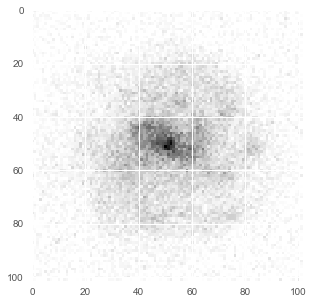

1237659146707009631


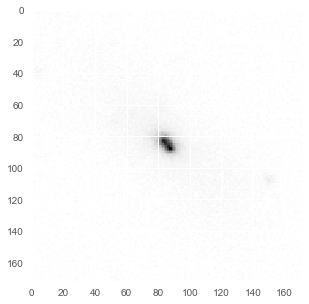

1237656538054918334


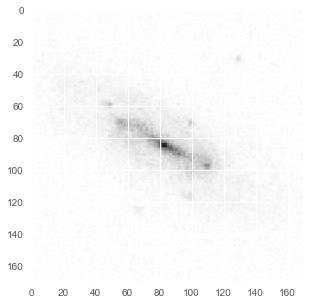

1237664852034257193


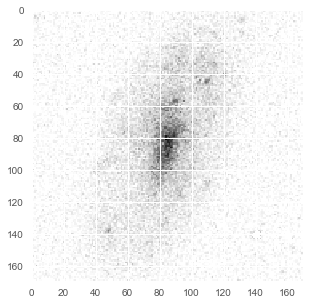

1237668496313549020


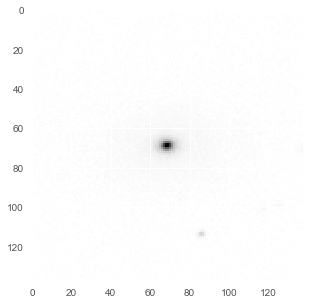

1237667322181255232


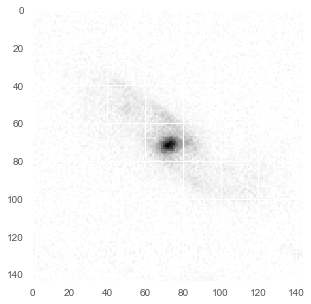

1237649962454614174


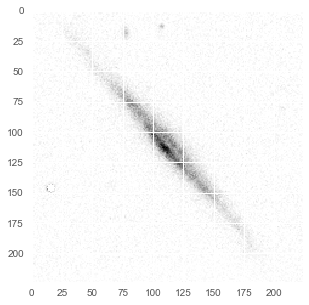

1237661922868134028


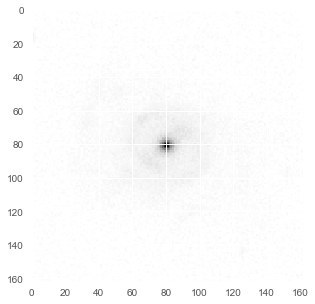

1237661948637085784


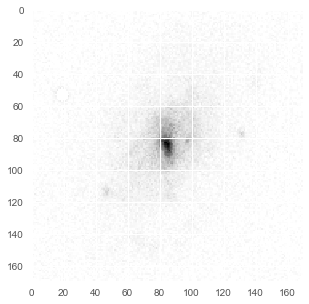

1237668298754359443


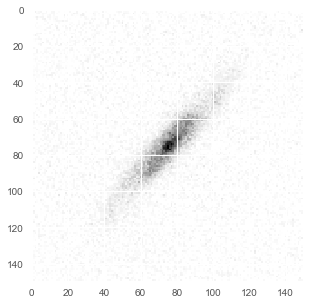

1237654398079533259


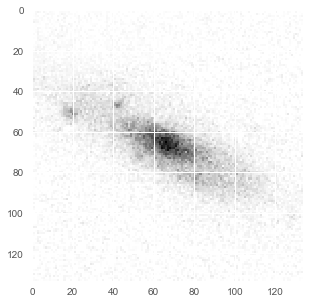

1237657584951034038


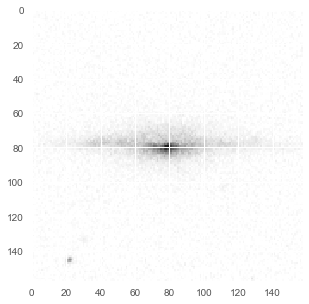

1237651754555080971


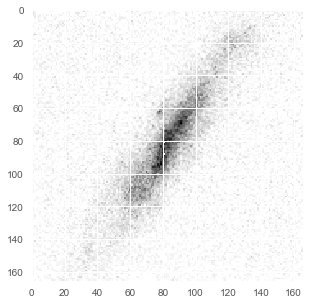

1237661874007376022


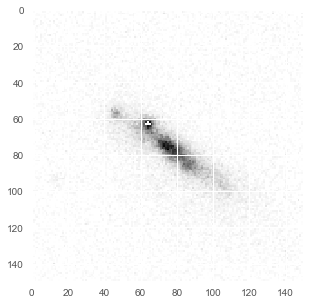

1237661152452804757


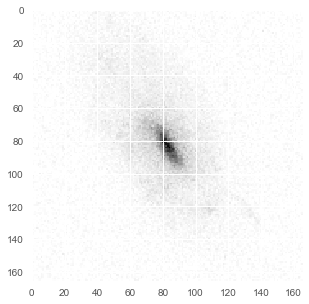

1237666339190341773


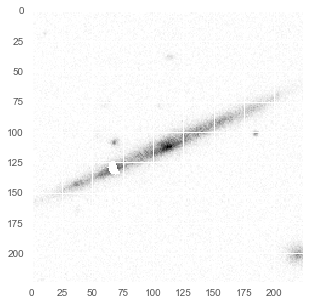

1237658425159516323


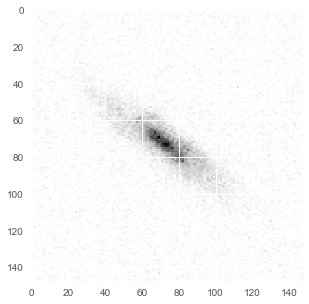

1237667915957993627


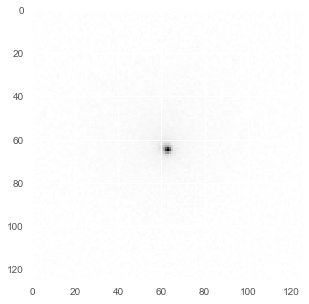

1237652949070905591


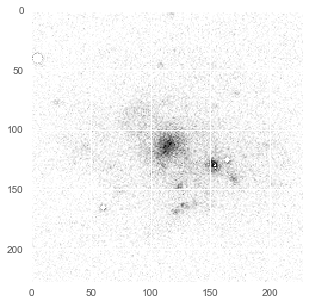

1237662193452187669


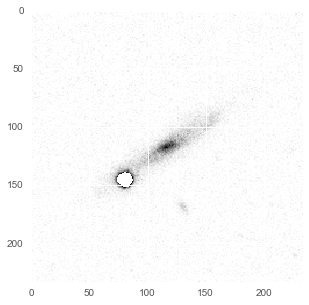

In [44]:
for id in ids:
    print(id)
    plt.figure(figsize=(5,5))
    Xg = np.genfromtxt('test_img_{}/{}-g.csv'.format(curr_idx, id), delimiter=',')
    Xg = cleanupImage2(Xg)
    Xg -= np.mean(Xg)
    Xg /= np.std(Xg)
    h,w = Xg.shape
    cy, cx = h//2, w//2
    dy, dx = cy//2, cx//2
    Xg = Xg[cy-dy:cy+dy,cx-dx:cx+dx]
    plt.imshow(Xg)
    plt.show()

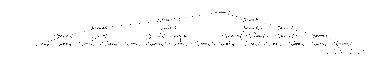

In [36]:
f, ax = plt.subplots(figsize=(6, 6))
plot_tree(model, ax, 2)

In [45]:
df.shape

(74883, 6)

In [115]:
n = 70
sdf = df.sort_values('logMstar')
first = list(sdf[:n].SDSS_ID)
last = list(sdf[-n:].SDSS_ID)

In [109]:
for id in first+last:
    #subprocess.call("mkdir test_img_{}".format(curr_idx), shell=True)
    subprocess.call("scp -i ~/.ssh/vsc_id_rsa.txt vsc31939@login.hpc.kuleuven.be:/user/leuven/319/vsc31939/data/ASTROHACK_DATA/Train/{}-g.csv test_min_max_mass/".format(id), shell=True)

In [116]:
tsne = TSNE(random_state=1234)

In [205]:
sorted_idx = np.argsort(df.logMstar)
first_idx = list(sorted_idx[:n])
last_idx = list(sorted_idx[-n:])
mid_start = int(len(sorted_idx)/2-n/2)
mid_end = int(len(sorted_idx)/2+n/2)
mid_idx = list(sorted_idx[mid_start:mid_end])

In [190]:
np.random.seed(1234)
rand_idxs = list(np.random.choice(2000, 500, replace=False))

In [208]:
idxs = [1700, 785, 108, 100, 977, 87, 1912, 499, 910, 2002]

In [209]:
X_imp = X[:,idxs+[3048]]
X_first = X_imp[first_idx,:]
X_last = X_imp[last_idx,:]
X_middle = X_imp[mid_idx,:]


In [210]:
X_tsne = tsne.fit_transform(np.vstack([X_first,X_middle,X_last]))

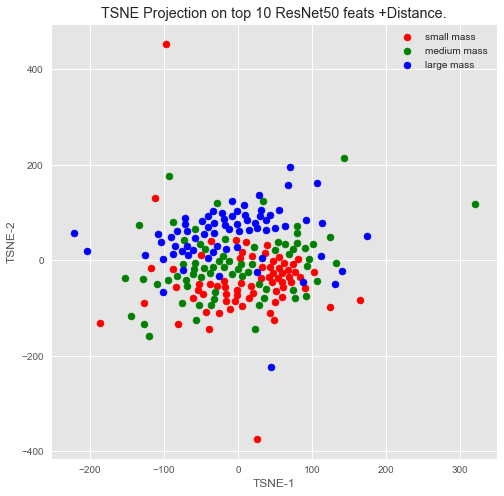

In [214]:
plt.figure(figsize=(8,8))
plt.scatter(X_tsne[:n,0], X_tsne[:n,1], c='red', label='small mass')
plt.scatter(X_tsne[n:-n,0], X_tsne[n:-n,1], c='green', label='medium mass')
plt.scatter(X_tsne[-n:,0], X_tsne[-n:,1], c='blue', label='large mass')
plt.title('TSNE Projection on top 10 ResNet50 feats +Distance.')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.legend()

In [90]:
df.loc[0].Distance

163.56198207122506

In [93]:
np.where(X[0,:]==df.loc[0].Distance)

(array([3048]),)